# **Using Machine Learning to Analyze Voice Disorders for Parkinson's Disease Detection**


The purpose of this project is to develop a machine learning model that can accurately predict the presence of Parkinson's disease in an individual based on their voice recordings. Parkinson's disease is a neurodegenerative disorder that affects movement, with symptoms that include tremors, stiffness, and difficulty with coordination.

<div style="text-align:center">
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX01JCEN/images/parkinson_patient_voice.png" width="500" alt="parkinson detection">
</div>


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
        </ol>
    </li>
    <li>
        <a href="#Parkinson Data and Voice Disorder">Parkinson Data and Voice Disorder</a>
    </li>
    <li><a href="#Loading Data">Loading Data</a></li>
    <li><a href="#Data Preparation">Data Preparation</a></li>
    <li><a href="#Train and Test Random Forest">Train and Test Random Forest Model</a></li>
    <li><a href="#Visualizing the decision tree">Find Strong Model</a></li>
</ol>


## Objectives



- Use Python for data analysis and machine learning
- Implement machine learning algorithms to detect Parkinson's disease in voice recordings
- Evaluate model performance
- Conduct grid search for tuning parameters
- Visualize the decision tree model


----


## Setup


### Installing Required Libraries


In [8]:
%%capture
!mamba install -- upgrade scikit-learn=1.2.1
!mamba install seaborn --y

In [9]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [10]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')


Creating helper function for plotting 


In [11]:
sns.set(style="whitegrid", color_codes=True)
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = 3*cm.max()/4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Parkinson Data and Voice Disorder

<a href=https://archive.ics.uci.edu/ml/datasets/parkinsons>Voice disorder dataset</a> can be used to detect the presence of Parkinson's disease in an individual. While current tools have limitations in analyzing complex voice disorders, advancements in technology and research have enabled the development of new algorithms that can identify specific acoustic markers associated with Parkinson's disease in voice recordings. Therefore, the analysis of voice disorders can provide valuable information in diagnosing and monitoring Parkinson's disease.



This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD).  Our dataset includes voice attributes Information that can be used for detecting parkinson, these information including:


Matrix column entries (attributes):  
- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- Five measures of variation in Frequency
    - MDVP:Jitter(%) - Percentage of cycle-to-cycle variability of the period duration
    - MDVP:Jitter(Abs) - Absolute value of cycle-to-cycle variability of the period duration
    - MDVP:RAP - Relative measure of the pitch disturbance
    - MDVP:PPQ - Pitch perturbation quotient
    - Jitter:DDP - Average absolute difference of differences between jitter cycles
- Six measures of variation in amplitude
    - MDVP:Shimmer - Variations in the voice amplitdue
    - MDVP:Shimmer(dB) - Variations in the voice amplitdue in dB
    - Shimmer:APQ3 - Three point amplitude perturbation quotient measured against the average of the three amplitude
    - Shimmer:APQ5 - Five point amplitude perturbation quotient measured against the average of the three amplitude
    - MDVP:APQ - Amplitude perturbation quotient from MDVP
    - Shimmer:DDA - Average absolute difference between the amplitudes of consecutive periods
- Two measures of ratio of noise to tonal components in the voice
    - NHR - Noise-to-harmonics Ratio and 
    - HNR - Harmonics-to-noise Ratio
- status - Health status of the subject (one) - Parkinson's, (zero) - healthy
- Two nonlinear dynamical complexity measures
    - RPDE - Recurrence period density entropy
    - D2 - correlation dimension
- DFA - Signal fractal scaling exponent
- Three nonlinear measures of fundamental frequency variation
    - spread1 - discrete probability distribution of occurrence of relative semitone variations
    - spread2 - Three nonlinear measures of fundamental frequency variation
    - PPE - Entropy of the discrete probability distribution of occurrence of relative semitone variations


## Loading data


In [12]:
data = pd.read_csv('/content/parkinsons.data', sep=',', index_col='name') # assign index column to name 
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


we can see the number of samples 


In [13]:
print(data.shape)

(195, 23)


To improve our understanding of the variables involved in parkinson detection, we first need to analyze the relationships within the data. Correlation diagrams can be helpful in visualizing how different variables are associated with each other and with parkinson status. Additionally, random forest models can help identify the importance of different features in predicting the target variable (parkinson).


<Axes: >

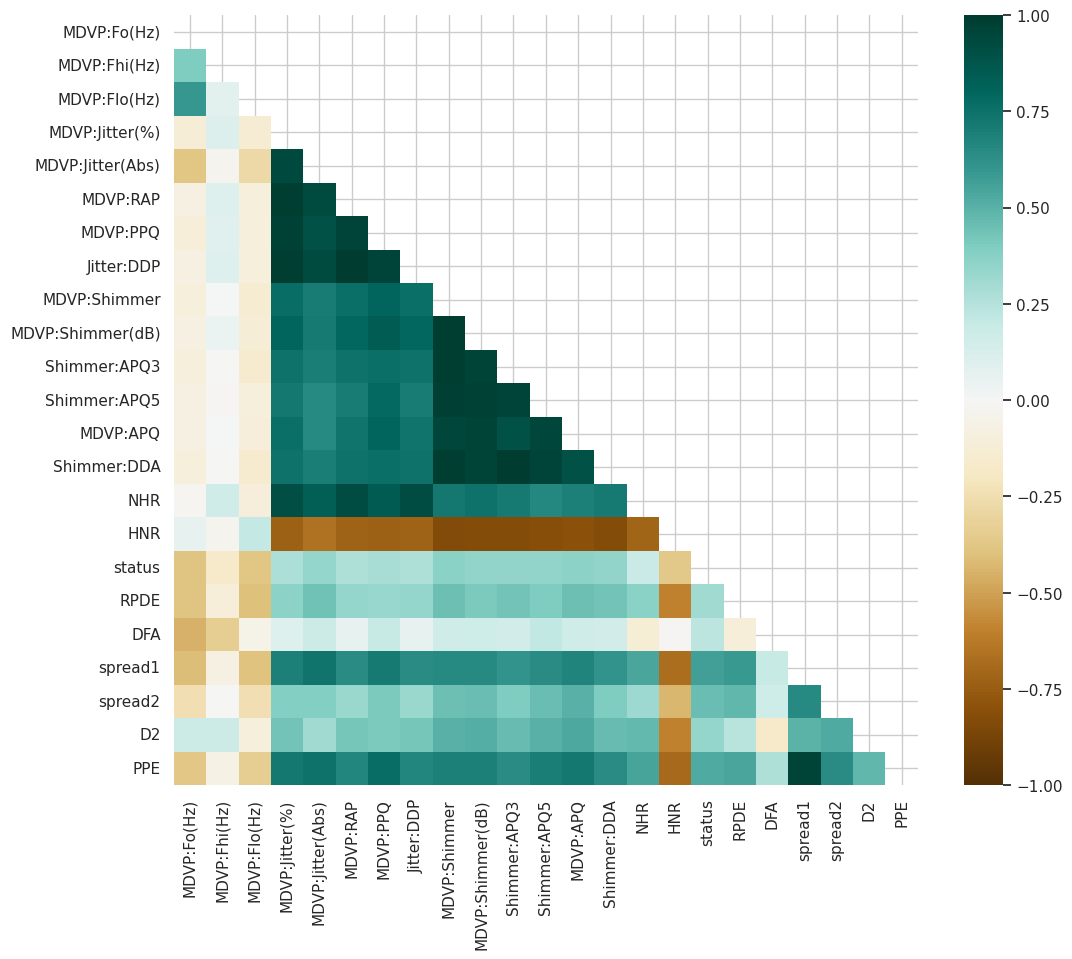

In [14]:
# creating the correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
sns.heatmap(data.corr(),vmin=-1, vmax=1,cmap='BrBG', mask=mask)

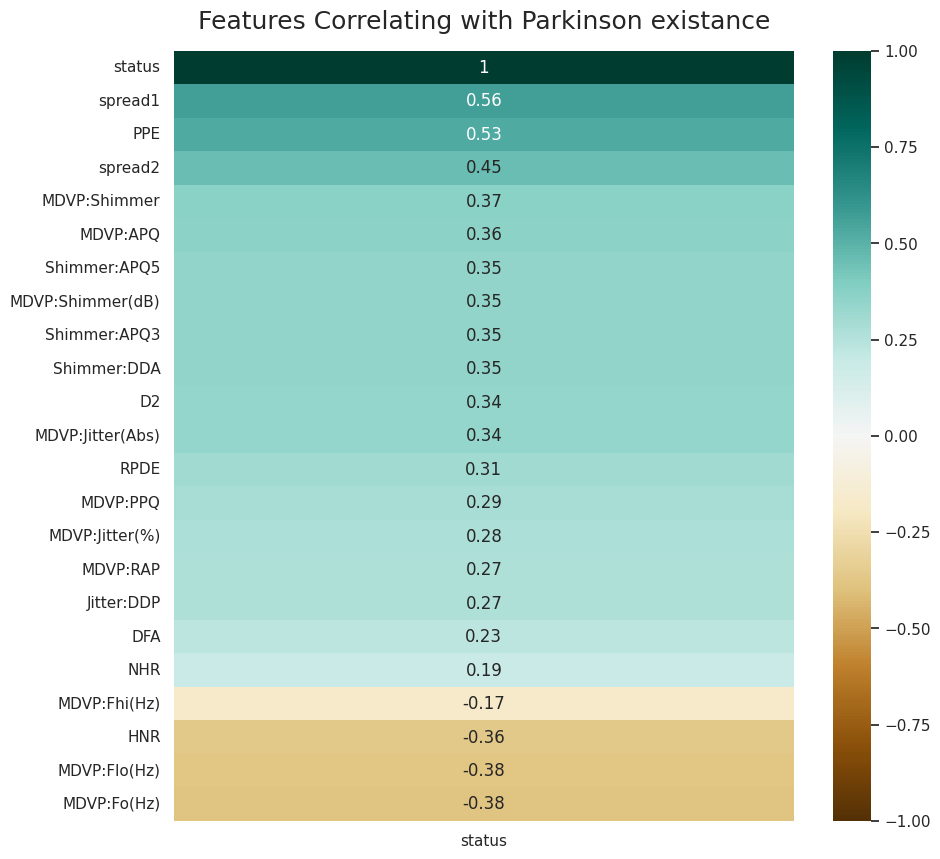

In [15]:
# modify the headmap plot to show correlation variables to the status 
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(data.corr()[['status']].sort_values(by='status', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Parkinson existance', fontdict={'fontsize':18}, pad=16);

Let's get the  features we select all columns in the dataset except for the `status` column. This is done using the ```drop``` method, which returns a new DataFrame with the specified columns (in this case, 'status') removed. The `axis=1` argument indicates that we're dropping a column, not a row.


In [16]:
X = data.drop('status', axis=1)
X.head()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


The   Health status of the subject (one) - Parkinson's, (zero) - healthy  is given in the ```status``` column:


In [17]:
y=data['status']
y.head()

name
phon_R01_S01_1    1
phon_R01_S01_2    1
phon_R01_S01_3    1
phon_R01_S01_4    1
phon_R01_S01_5    1
Name: status, dtype: int64

we can see that 3/4 of the samples are have Parkinson's:


In [18]:
y.value_counts(normalize=True)

1    0.753846
0    0.246154
Name: status, dtype: float64

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a machine learning technique used for dimensionality reduction and visualization of high-dimensional datasets. It is particularly useful for visualizing complex data structures, as it helps to project the data points from a high-dimensional space to a lower-dimensional space (usually 2D or 3D) while preserving the relationships between the data points as much as possible. Lets apply it to our dataset:


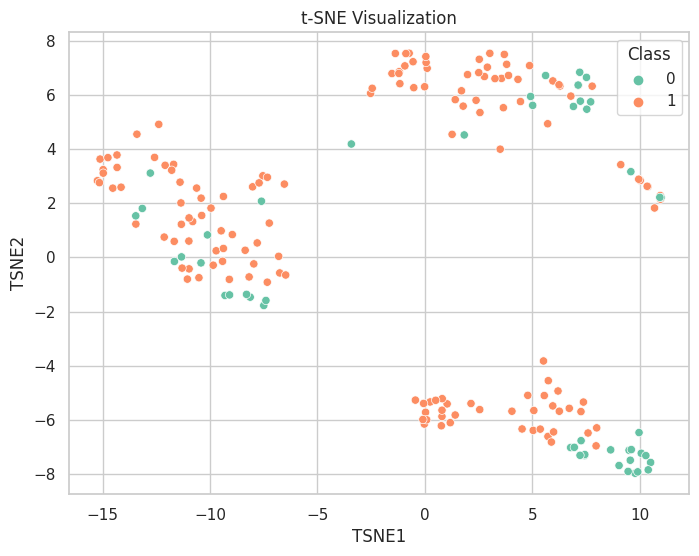

In [19]:
import seaborn as sns
from sklearn.manifold import TSNE

# Apply t-SNE to reduce the dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the t-SNE-transformed data and class labels
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Class'] = y.values

# Visualize the data based on class using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set2')
plt.title('t-SNE Visualization')
plt.show()

## Data preparation

Here, we are splitting a dataset into independent and dependent variables, and then splitting it further into training and testing sets.


In [20]:


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)


# print the shape of train and test data
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (136, 22)
y_train shape:  (136,)
X_test shape:  (59, 22)
y_test shape:  (59,)


## k-Nearest Neighbors (k-NN)


### K-NN 




In k-NN, the basic idea is to predict the label of a new instance based on the labels of its k nearest neighbors in the training data. 

We import the library 


In [21]:
from sklearn.neighbors import KNeighborsClassifier

we create a knn object 


In [22]:
knn = KNeighborsClassifier(n_neighbors=3)

we fit the object


In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

 Make predictions on the testing data


In [24]:
y_pred = knn.predict(X_test)
y_pred[0:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0])

We can  get a probability of belonging to a each class for each sample, here are the first ten


In [25]:
knn.predict_proba(X_test)[0:10]

array([[0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

 The confusion matrix is a table that shows the number of true positive, true negative, false positive, and false negative predictions. The classification report provides the precision, recall, F1-score, and support for each class, which are important metrics for evaluating the performance of a classifier. The accuracy score is a simple metric that calculates the proportion of correct predictions out of the total predictions made by the model. These three elements together provide a comprehensive evaluation of the classifier's performance on the test dataset. Let's prints the confusion matrix, classification report, and accuracy score for a given classification model.


In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

Confusion matrix, without normalization
[[ 9  3]
 [ 5 42]]


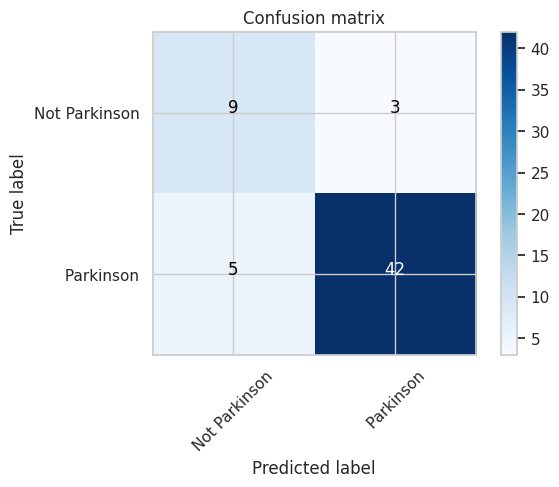

In [27]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')

In [28]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.93      0.89      0.91        47

    accuracy                           0.86        59
   macro avg       0.79      0.82      0.80        59
weighted avg       0.87      0.86      0.87        59


Accuracy Score: 0.864406779661017


## GridSearchCV


In the code above, we randomly selected the hyperparameter ```K``` for our KNN classifier. However, in order to find the optimal hyperparameters that maximize the performance metric, we will perform a grid search. To do this, we define a parameter grid that we will search over for ```K```.


In [29]:

param_grid = {
    'n_neighbors': [3, 5, 7, 9],

}


Define the KNN classifier object


In [30]:

knn = KNeighborsClassifier()



In medical testing, recall is a measure of the ability of a test to correctly identify true positive cases, or the proportion of actual positive cases that are correctly identified by the test. A high recall means that the test is able to correctly identify a large proportion of true positive cases, even if it may also produce some false positive results, therefore for ```scoring``` we select recall . The choice of performance metric for a machine learning model may depend on several factors. 

The next cell  performs a grid search over the hyperparameters of a KNN classifier using ```GridSearchCV()``` function from scikit-learn library. The param_grid parameter specifies a dictionary of hyperparameters to search over, while the scoring parameter specifies the performance metric to optimize for, which in this case is the recall. The cv parameter specifies the number of folds for cross-validationv ```cv``` . The resulting grid_search object can be used to fit the data and obtain the best hyperparameters that maximize the performance metric.


In [31]:
from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(knn, param_grid, scoring='recall', cv=5)

grid_search 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='recall')

Fit the grid search to the training data


In [32]:

grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='recall')

 Print the best parameters and score on validation data 


In [33]:

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'n_neighbors': 9}
Best Score:  0.97


Get the predicted labels on the test data using the best estimator:


In [34]:

y_pred = grid_search.best_estimator_.predict(X_test)



Calculate the recall score on the test data using the predicted labels:


In [35]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)

recall

0.9148936170212766

we can make a prediction 


In [36]:
y_hat = grid_search.best_estimator_.predict(X)

Now we use all our data to train the model 


In [37]:
knn = KNeighborsClassifier()
knn.fit(X,y)

KNeighborsClassifier()

let's study our predictions  


In [38]:
y_hat =knn.predict(X)

we can plot the confusion matrix 


Confusion matrix, without normalization
[[ 32  16]
 [  5 142]]


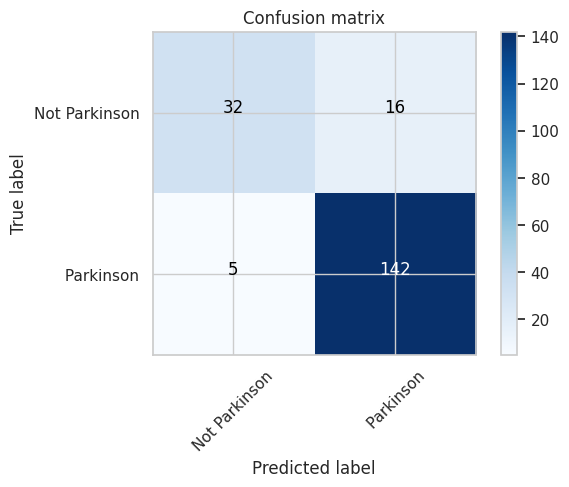

In [39]:
plot_confusion_matrix(confusion_matrix(y, y_hat),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')

let's label true positives, false positives, true negatives, and false negatives 


### Machine Learning Interpretability
Machine learning interpretability refers to the ability to understand and explain how a machine learning model arrives at its predictions or decisions. It is an important aspect of machine learning because it enables users to gain insight into how a model works, assess its strengths and limitations, and identify potential issues such as bias, errors, or overfitting. Interpretability can be achieved through a variety of techniques such as visualizations, feature importance scores, model-agnostic methods, and explanations of specific decisions. 
T-SNE can be used for machine learning interpretability by visualizing high-dimensional data in a two-dimensional space.  For example, in the context of clustering, t-SNE can be used to visualize the clusters in a two-dimensional space, making it easier to identify patterns and relationships between the data points. This can help to identify outliers, clusters that are not well-separated, and potentially interesting subsets of the data that may warrant further investigation. Let's label our predictions


In [40]:
# find true positives(tp)
tsne_df['label']=''
tsne_df['label'].iloc[np.where((y_hat == 1) & (y == 1))]="TP"
# find true negatives (tn)
tsne_df['label'].iloc[np.where((y_hat == 0) & (y == 0))]="TN"
# find false positives (fp)
tsne_df['label'].iloc[np.where((y_hat == 1) & (y == 0))]="FP" 
# find false negatives (fp)
tsne_df['label'].iloc[np.where((y_hat == 0) & (y == 1))]="FN"

Let's plot the data, with the labeled predictions


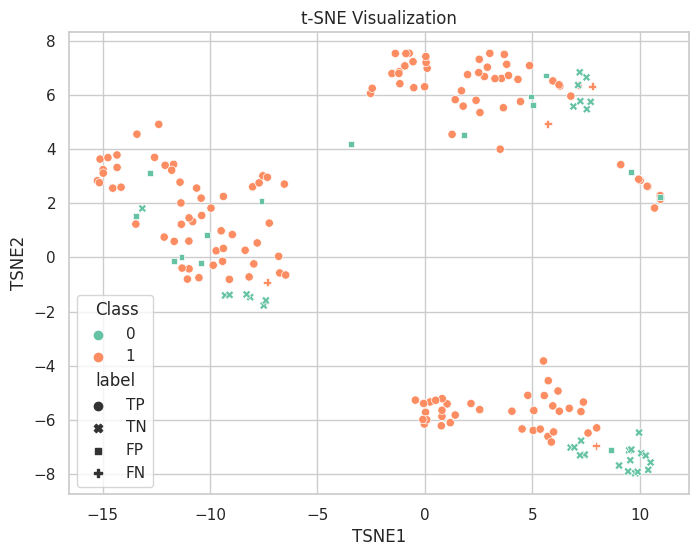

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set2',style='label')
plt.title('t-SNE Visualization')
plt.show()

From the plot, we see most of the errors are confined to specific clusters. We can apply clustering to our data before we classify the data, but let's try several other models. Here are several more libraries for Machine Learning Interpretability


<ul>
  <li><a href="https://github.com/slundberg/shap">SHAP</a></li>
  <li><a href="https://github.com/marcotcr/lime">LIME</a></li>
  <li><a href="https://github.com/oracle/Skater">Skater</a></li>
  <li><a href="https://github.com/microsoft/interpret">Microsoft InterpretML</a></li>
  <li><a href="https://github.com/interpretml/interpret-text">Interpret-text</a></li>
  <li><a href="https://github.com/interpretml/interpret-core">Interpret-core</a></li>
  <li><a href="https://github.com/surrey-unplugged/saliency">Saliency</a></li>
  <li><a href="https://github.com/PAIR-code/facets">Facets</a></li>
  <li><a href="https://github.com/marcotcr/photonai">Photonai</a></li>
</ul>


## Logistic Regression


 here's an example code for fitting a logistic regression model using scikit-learn, it's almost identical to K-NN , first we import ```LogisticRegression```


In [42]:
from sklearn.linear_model import LogisticRegression

 We create and fit logistic regression model ```lr``` and fit it 


In [43]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

we can make a prediction on the first ten samples


In [44]:
y_pred = lr.predict(X_test)
y_pred[0:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0])

We can get a probability of belonging to a each class for each sample, here are the first ten 


In [45]:
lr.predict_proba(X_test)[0:10]


array([[0.26796849, 0.73203151],
       [0.69161219, 0.30838781],
       [0.06764952, 0.93235048],
       [0.38588988, 0.61411012],
       [0.07237225, 0.92762775],
       [0.26252443, 0.73747557],
       [0.00912184, 0.99087816],
       [0.5108703 , 0.4891297 ],
       [0.85915321, 0.14084679],
       [0.90263876, 0.09736124]])

We can display the confusion matrix as well as a classification report 


Confusion matrix, without normalization
[[ 9  3]
 [ 6 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67        12
           1       0.93      0.87      0.90        47

    accuracy                           0.85        59
   macro avg       0.77      0.81      0.78        59
weighted avg       0.86      0.85      0.85        59


Accuracy Score: 0.847457627118644


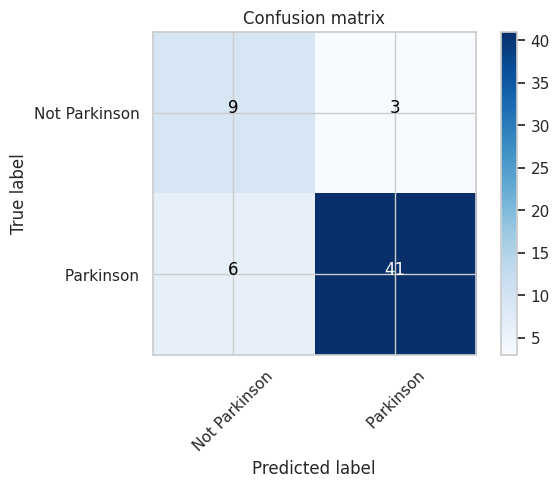

In [46]:

plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

While grid search can be used to optimize hyperparameters for many machine learning algorithms, the hyperparameters in logistic regression may not be particularly insightful. Instead, we can use logistic regression to identify feature importance, as the coefficients learned during training can reveal which features are most strongly associated with the target variable. We can obtain the coefficients.


In [47]:
coef=abs(lr.coef_[0])

the coefficients represent the impact of each feature on the probability of the positive class, So larger the magnitude  of the coefficients  are more important the feature


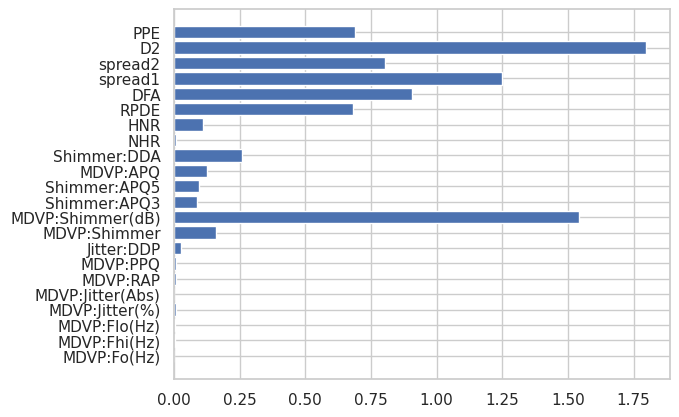

In [48]:
plt.barh(X.columns, coef)
plt.show()

We can select the features with the highest magnitude coefficients 


In [49]:
best_columns=X.columns[np.argsort(-1*coef)[0:5]]
best_columns

Index(['D2', 'MDVP:Shimmer(dB)', 'spread1', 'DFA', 'spread2'], dtype='object')

Confusion matrix, without normalization
[[ 9  3]
 [ 6 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67        12
           1       0.93      0.87      0.90        47

    accuracy                           0.85        59
   macro avg       0.77      0.81      0.78        59
weighted avg       0.86      0.85      0.85        59


Accuracy Score: 0.847457627118644


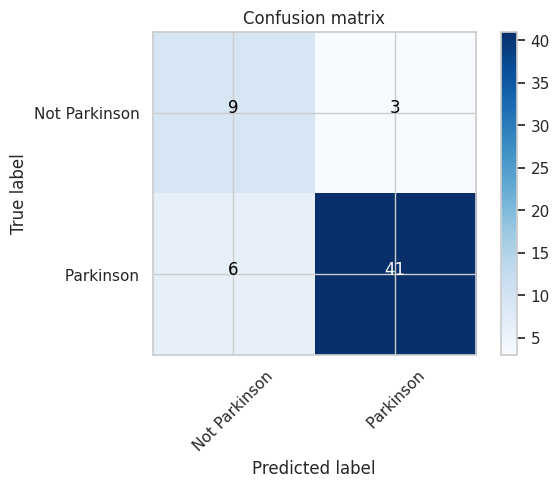

In [50]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train[best_columns], y_train)

# Get the predicted probabilities for each class
y_pred_proba = log_reg.predict_proba(X_test[best_columns])

plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

We see many of the  features are redundant, identifying and removing redundant features can potentially help in a few ways.

First, it can reduce the amount of data required for the model, which can reduce the cost of storing and processing data.

Second, it can improve the performance of the model, allowing it to make more accurate predictions with fewer resources. This can help reduce the cost of misclassifications or errors in the predictions.

Finally, it can also reduce the cost of model development and maintenance. Removing redundant features can simplify the model, making it easier to develop and maintain over time. It can also reduce the need for frequent updates and retraining, which can be costly in terms of time and resources


## Support Vector Machines (SVM)


SVM stands for Support Vector Machines. It is a type of supervised machine learning algorithm used for classification. The algorithm identifies a hyperplane (or a set of hyperplanes) in an n-dimensional space that maximally separates the different classes in the dataset. The hyperplane that is selected is the one that has the maximum margin between the closest points of different classes, known as support vectors. SVM is particularly effective in high-dimensional datasets where other algorithms may have difficulty in identifying a clear boundary between the classes. SVM is also versatile in the type of kernel functions that can be used to transform the data into higher dimensions, such as linear, polynomial, and radial basis function (RBF) kernels.

Like Logistic Regression SVM is a linear classifier but there are some Pros and Cons

### Pros of SVM over Logistic Regression
<ul>
<li>Effective in high dimensional spaces and with datasets that have a lot of features</li>
<li>Can handle non-linearly separable data using kernel trick</li>
<li>Robust to overfitting due to the regularization parameter</li>
</ul>

### Cons of SVM compared to Logistic Regression<b>
<ul>
<li>Can be computationally expensive to train, especially with large datasets</li>
<li>Difficult to interpret the results and understand the impact of each feature on the model</li>
<li>Requires careful selection of hyperparameters to achieve optimal performance</li>
</ul>
You can train a SVM just like any other model 


### Train and Test SVM Model using the SVC constructor and display the confusion matrix, use the appropriate datasets for each task.


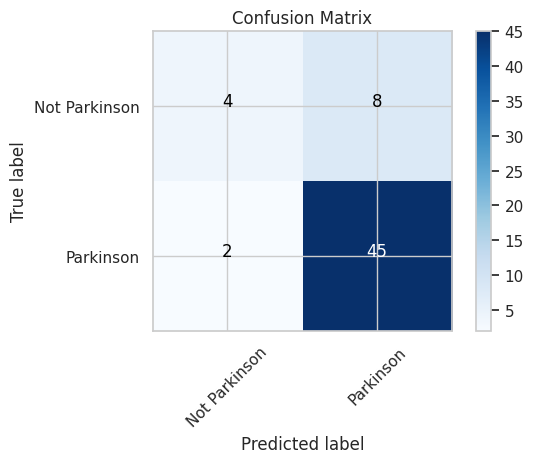

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Train the SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the test set
y_hat = svm.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_hat)
classes = ["Not Parkinson", "Parkinson"]

# Plot the confusion matrix
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Label the matrix cells
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], "d"),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()



<details>
    <summary>Other Solution</summary>

```python

# Train the SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the test set
y_hat = svm.predict(X_test)

# confusion_matri
plot_confusion_matrix(confusion_matrix(y_test, y_hat),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')
```

</details>


Here are the explanations for some of the important parameters: 
    
```C:``` Regularization parameter. A smaller value of C creates a wider margin but may lead to more misclassifications, while a larger value of C creates a narrower margin but may lead to overfitting

```kernel:``` Type of kernel function used to transform the data into a higher-dimensional space where it can be linearly separated. Common choices include linear, polynomial, and radial basis function (RBF) kernels

```gamma:``` Kernel coefficient for RBF, polynomial, and sigmoid kernels. A smaller value of gamma creates a larger influence radius for the support vectors, while a larger value of gamma creates a smaller influence radius and can lead to overfitting

```degree:``` Degree of the polynomial kernel function. Only used for polynomial kernel.    
    


here is a dictionary for grid search with some of the specified parameters:


In [52]:
param_grid = {
    'C': [0.1, 1,],
    'gamma': [0.1, 1, 10],

}

###Performing grid search on an SVM classifier with the specified hyperparameters and using recall as the scoring metric find the best hyperparameters and the corresponding recall score:


In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Train the SVM classifier
svm = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, scoring='recall', cv=2)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding recall score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best recall score: ", grid_search.best_score_)


Best hyperparameters:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best recall score:  1.0


<details>
    <summary>Other Solution</summary>

```python

# Train the SVM classifier
svm = SVC()
# Create a GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, scoring='recall', cv=2)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding recall score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best recall score: ", grid_search.best_score_)


```

</details>


##  Random Forest Model



Random Forest is a good choice for various machine learning tasks due to its high accuracy in classifying complex data patterns. The ability to interpret the results of Random Forest models also makes it easier to validate and understand the decisions it makes.


In [54]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest model
rf = RandomForestClassifier(random_state=123)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 89.83%


Perform grid search for RandomForest to tune the parameters


In [55]:
# write your code here
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt', 'log2']
}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}


<details>
    <summary>Other Solution</summary>



```python
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt', 'log2']
}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_
```
</details>


<Axes: >

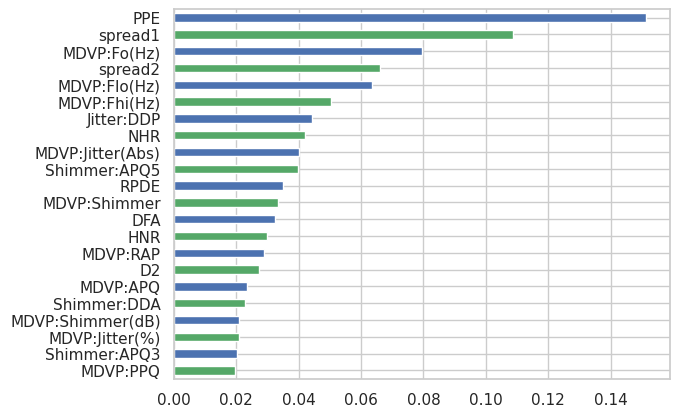

In [57]:
# Fit the RandomForestClassifier model
rf.fit(X, y)  # Replace X and y with your actual feature matrix and target variable

# Calculate and plot feature importances
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', color=['g', 'b'])


To save the trained model we utilize liberary `pickle`


In [58]:
import pickle

# Save the model to a file
filename = 'rf_model_parkinson'
pickle.dump(rf, open(filename, "wb"))

### Visualizing the Decision Trees

using the `dtreeviz` library, we are able to visualize the decision tree. This can contribute to better the understanding of the role of our variables in identifying Parkinson.

At first, let's tune the parameters for the decision tree classifier:


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4}
Best recall score: 0.8746031746031745


Apply the parameters to model:


In [60]:

clf=grid_search.best_estimator_
#same as
#clf = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1, min_samples_split=2, criterion= 'entropy')
#clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)


Next, we plot the tree:


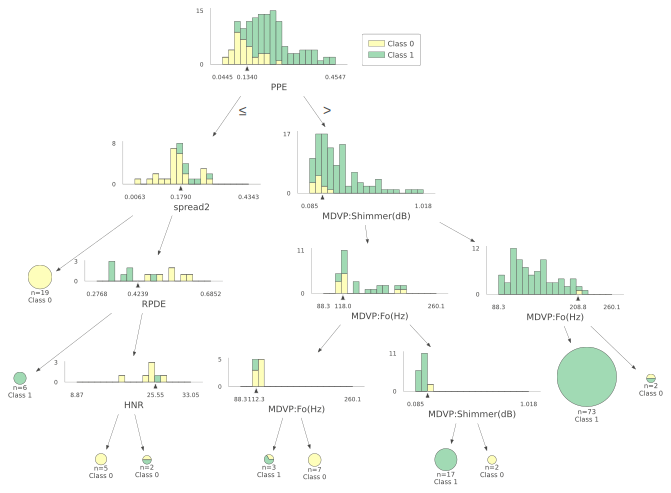

In [61]:
# plot the tree 
import dtreeviz

# Getting the list of variables
feature_names = list(X_train.columns)

# visualizing the tree
viz_model = dtreeviz.model(clf,
                           X_train=X_train, y_train=y_train, 
                           feature_names=feature_names)

v = viz_model.view(fancy=True)     # render as SVG into internal object 
v

Let's choose a random point and visualize the decision path:


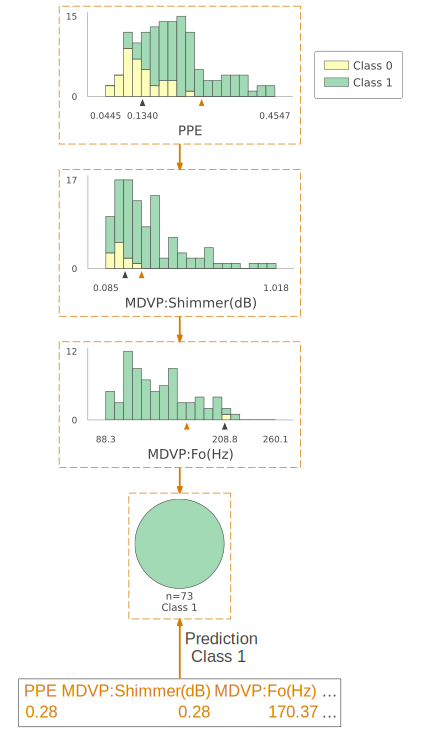

In [62]:
# get a random point
rand = np.random.randint(0, len(X))
sample_point = X.iloc[rand,:].values

# visualizing the path for the point
v = viz_model.view(fancy=True,scale=1.5,x=sample_point,show_just_path=True)
v